In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
color_pal = sns.color_palette()
import plotly.express as px
import numpy as np
%matplotlib inline

In [2]:
!head /home/n-3331/Documents/Datasets/FreeCodeCamp-Pandas-Real-Life-Example-master/data/sales_data.csv

Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,4

In [3]:
sales = pd.read_csv('/home/n-3331/Documents/Datasets/FreeCodeCamp-Pandas-Real-Life-Example-master/data/sales_data.csv',parse_dates=['Date'])

In [4]:
sales.head(60)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [5]:
sales.shape

(113036, 18)

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [7]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [8]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [9]:
sales['Unit_Cost'].mean()

267.296365759581

In [10]:
sales['Unit_Cost'].median()

9.0

<AxesSubplot: >

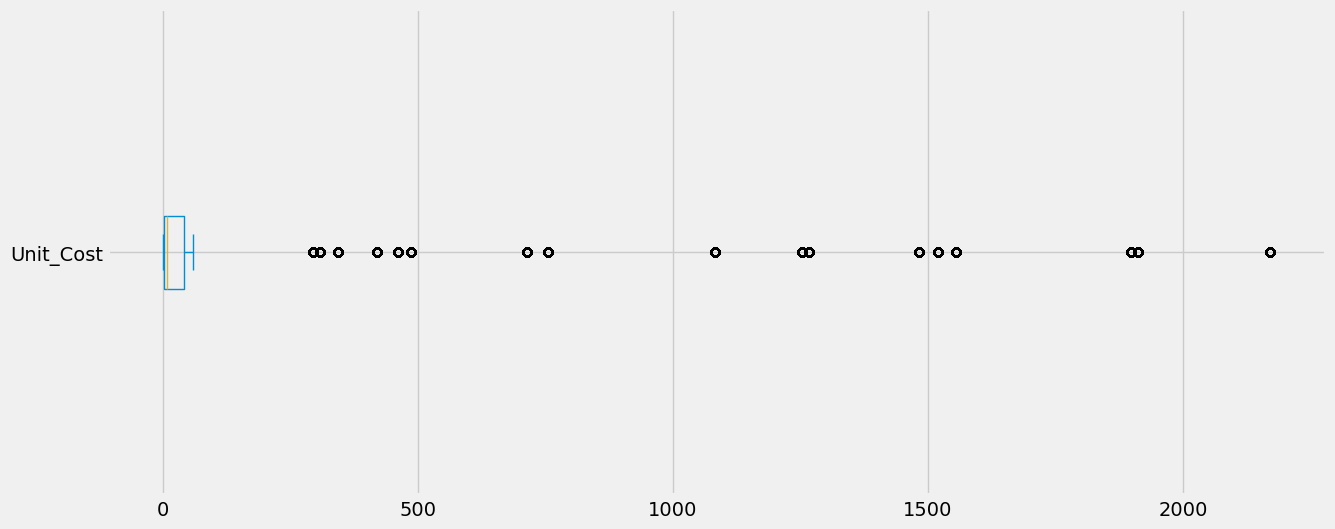

In [11]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot: ylabel='Density'>

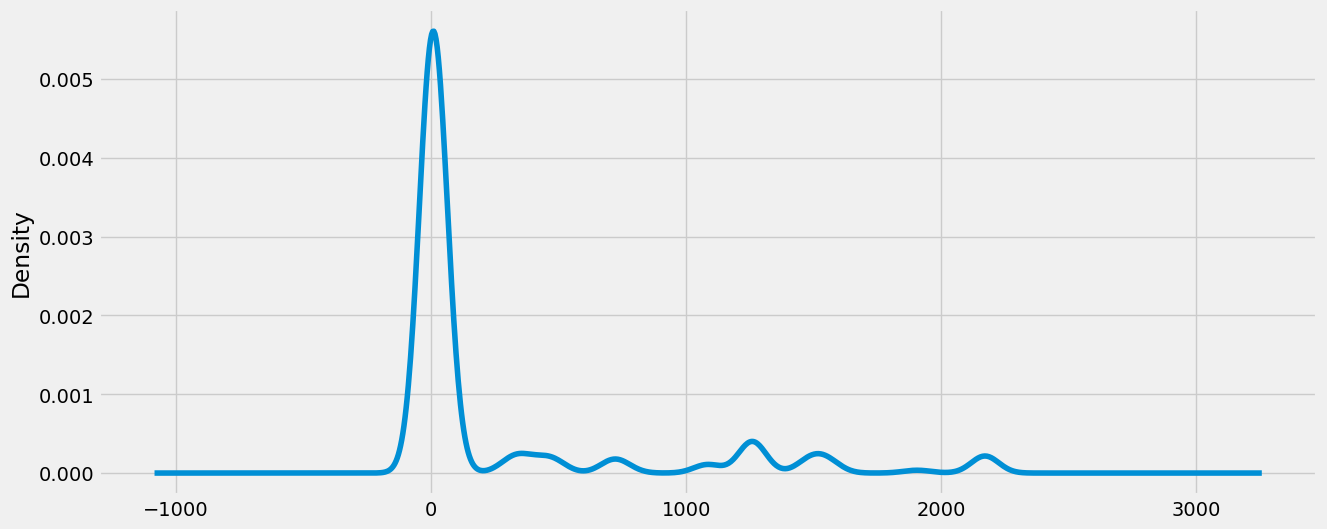

In [12]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) #kde (Kernel Density Estimation)

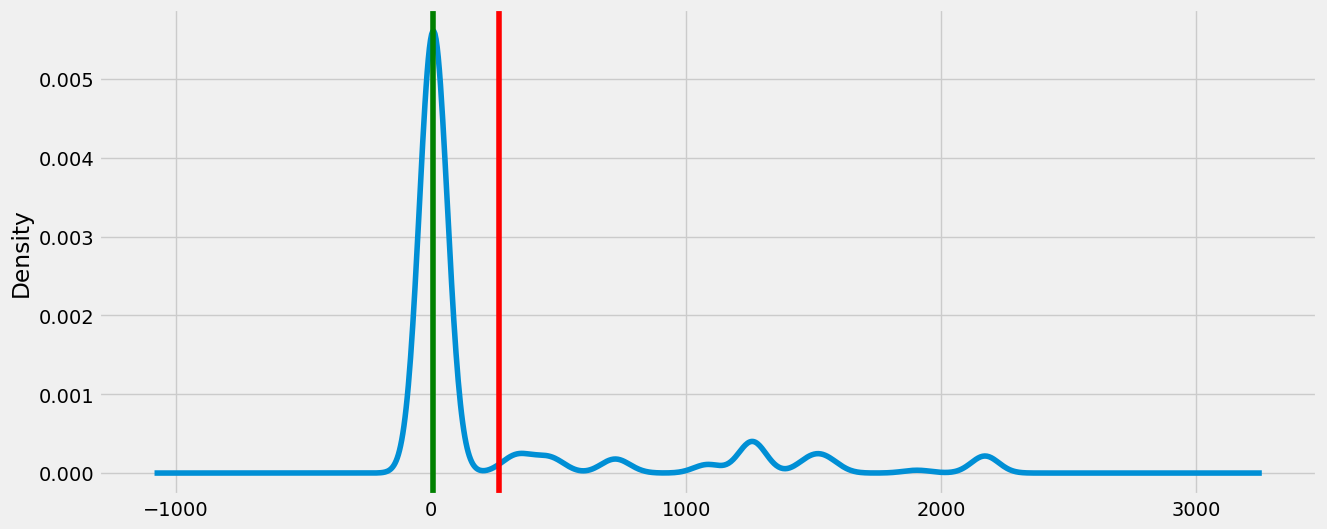

In [13]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) #kde (Kernel Density Estimation)
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'Dollars')

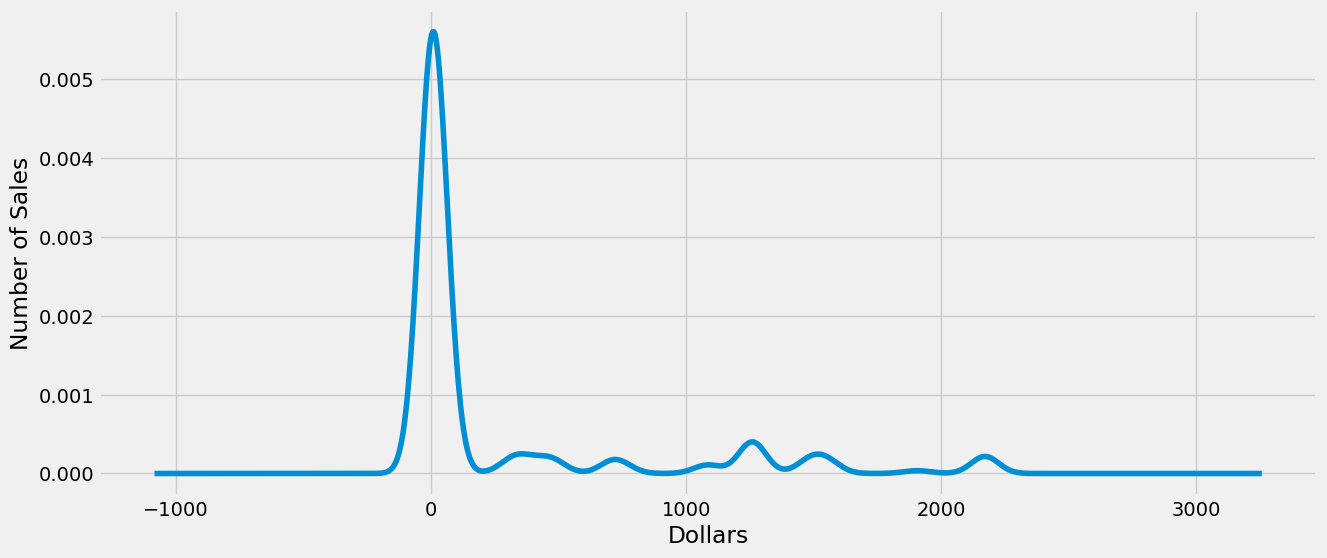

In [14]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) #kde (Kernel Density Estimation)
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

Text(0.5, 0, 'Dollars')

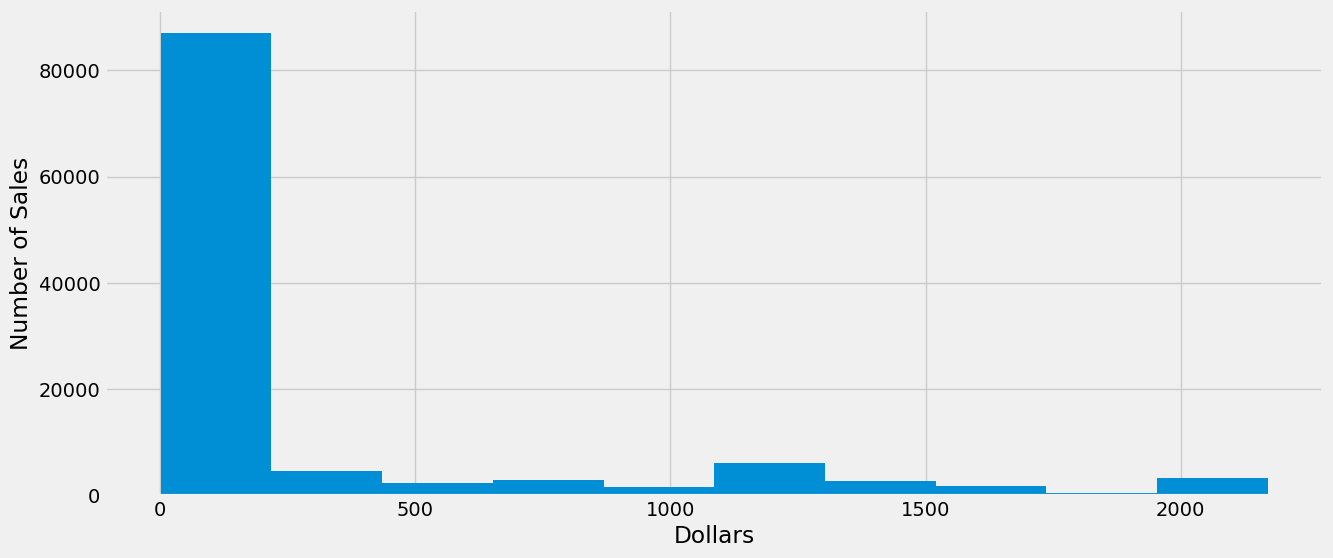

In [15]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

## What's the mean of Customers_Age?

In [16]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [17]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot: ylabel='Age_Group'>

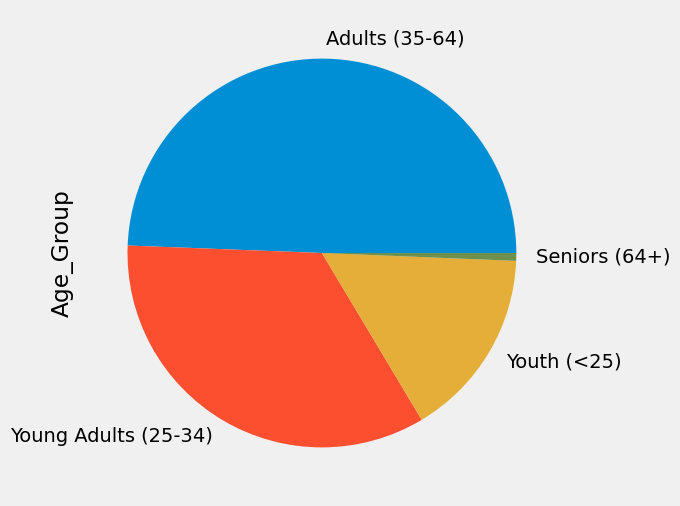

In [18]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

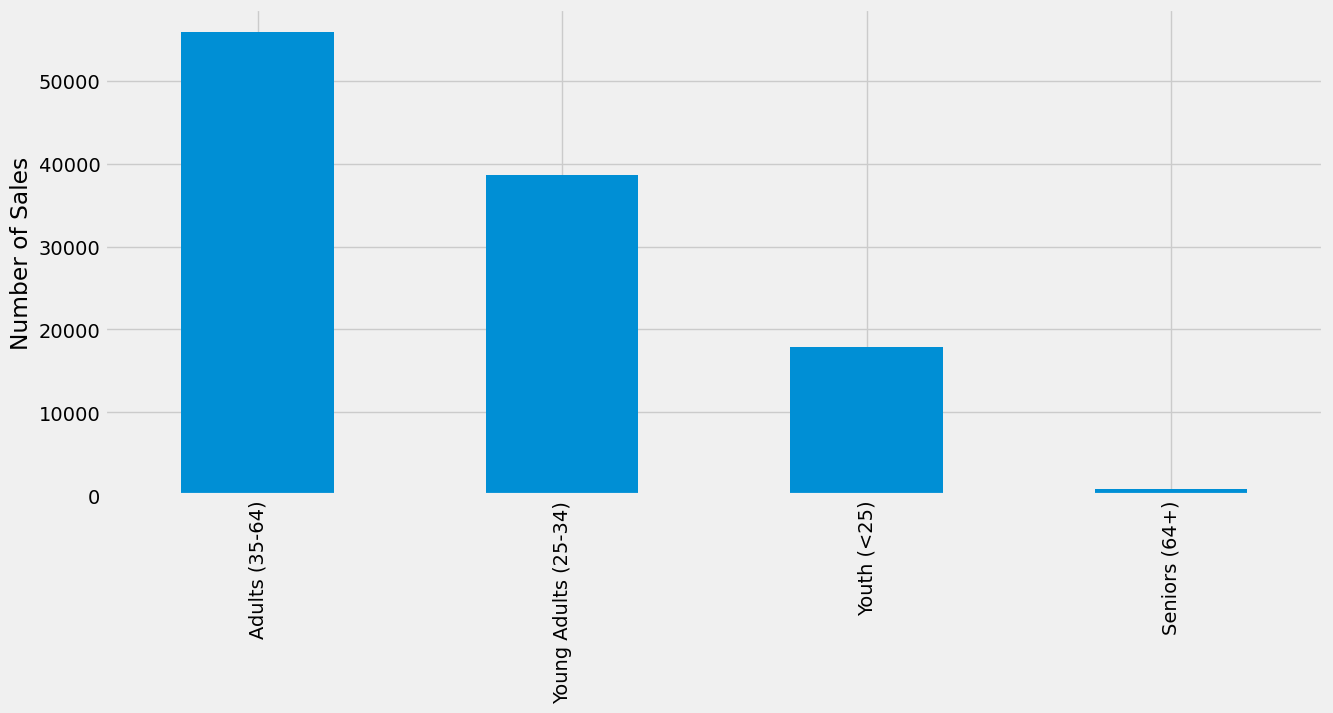

In [19]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

## Realtionship between the columns?

In [20]:
corr = sales.corr()
corr

/tmp/ipykernel_5549/826334997.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


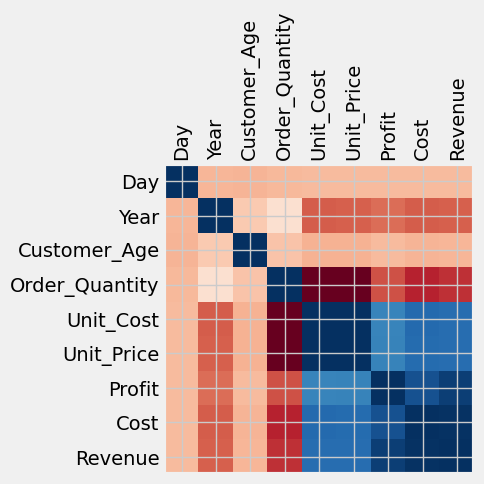

In [21]:
fig = plt.figure(figsize=(4,4))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [22]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


<AxesSubplot: xlabel='Customer_Age', ylabel='Revenue'>

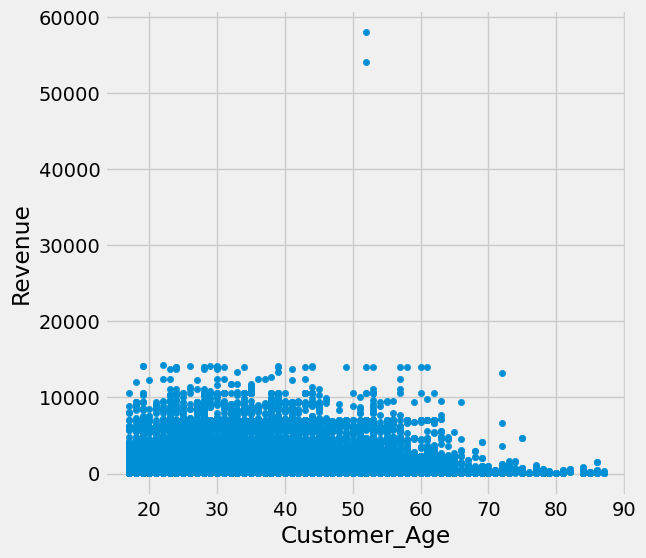

In [23]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

<AxesSubplot: xlabel='Revenue', ylabel='Profit'>

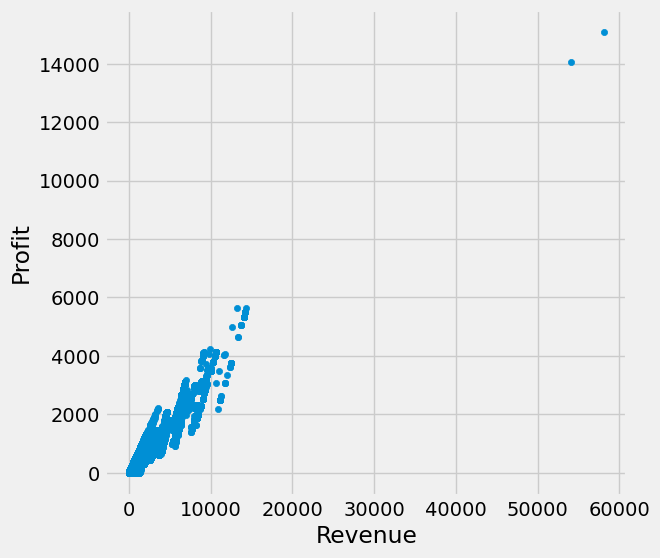

In [24]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

Text(0, 0.5, 'Profit')

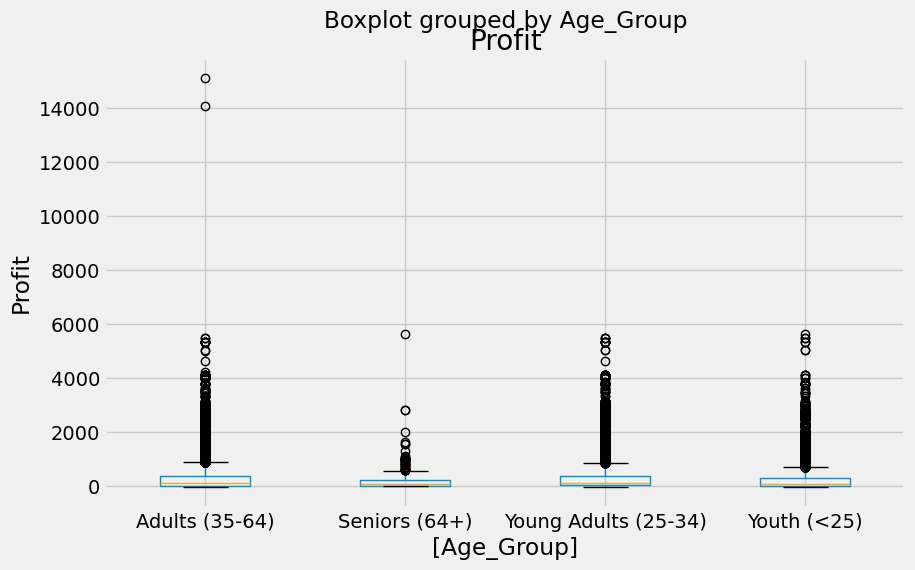

In [25]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10, 6))
ax.set_ylabel('Profit')

Year                  AxesSubplot(0.08,0.511818;0.255882x0.368182)
Customer_Age      AxesSubplot(0.387059,0.511818;0.255882x0.368182)
Order_Quantity    AxesSubplot(0.694118,0.511818;0.255882x0.368182)
Unit_Cost                 AxesSubplot(0.08,0.07;0.255882x0.368182)
Unit_Price            AxesSubplot(0.387059,0.07;0.255882x0.368182)
Profit                AxesSubplot(0.694118,0.07;0.255882x0.368182)
dtype: object

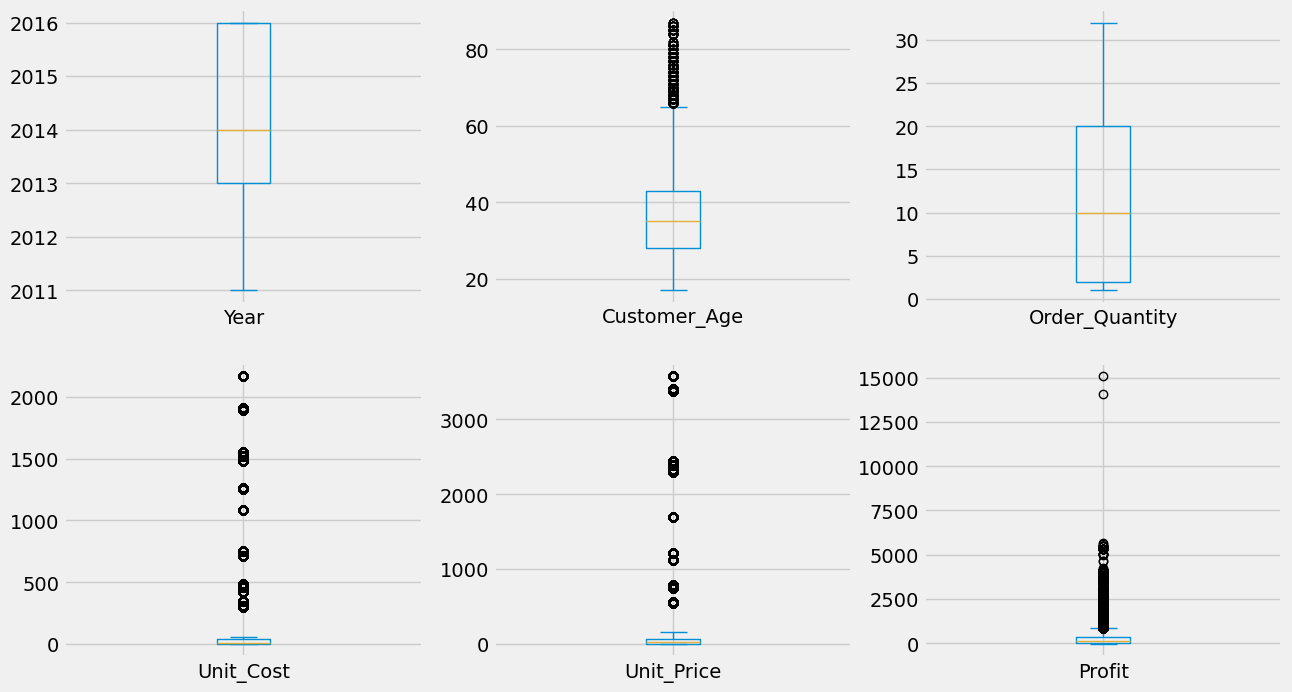

In [26]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2, 3), figsize=(14, 8))

## Column Wrangling

#### we can also create new columns or modify existing ones

### Add and calculate a new Revenue_per_Age column

In [27]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

In [28]:
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot: ylabel='Density'>

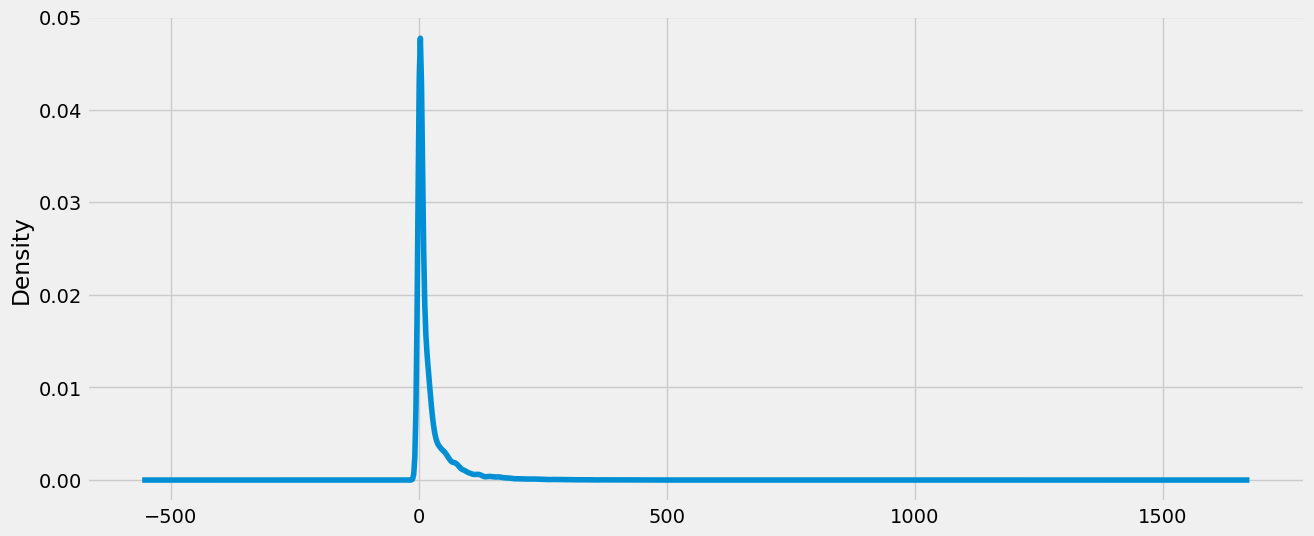

In [29]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14, 6))

<AxesSubplot: ylabel='Frequency'>

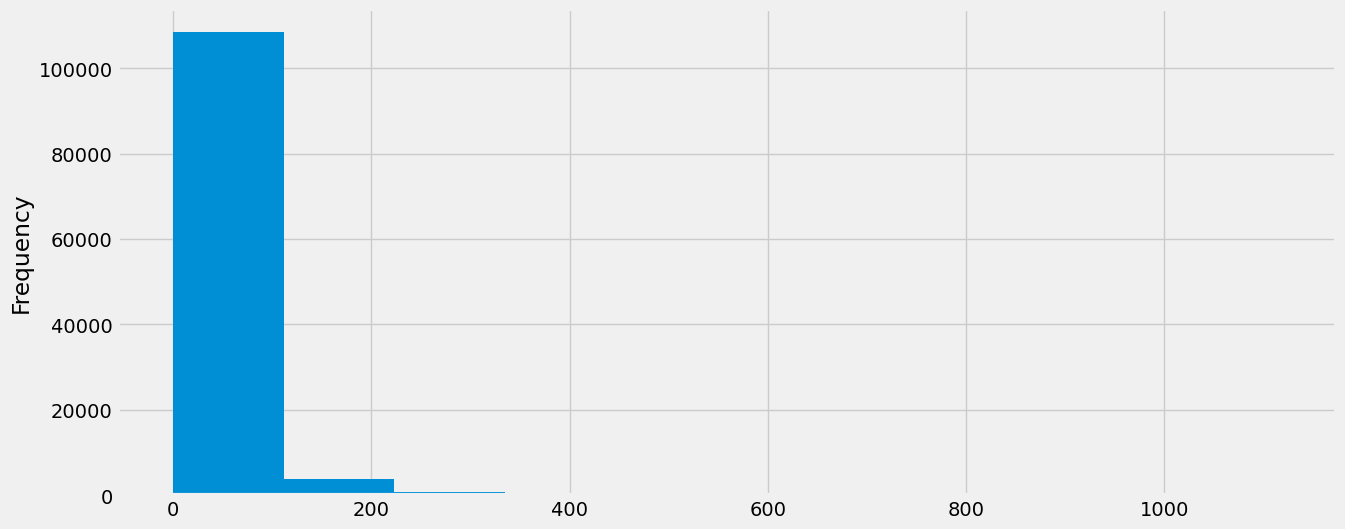

In [30]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14, 6))

### Add and calculate a new Calculated_Cost column

#### Calculated_Cost = Order_Quantity * Unit_Cost

In [31]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

In [32]:
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [33]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

<AxesSubplot: xlabel='Calculated_Cost', ylabel='Profit'>

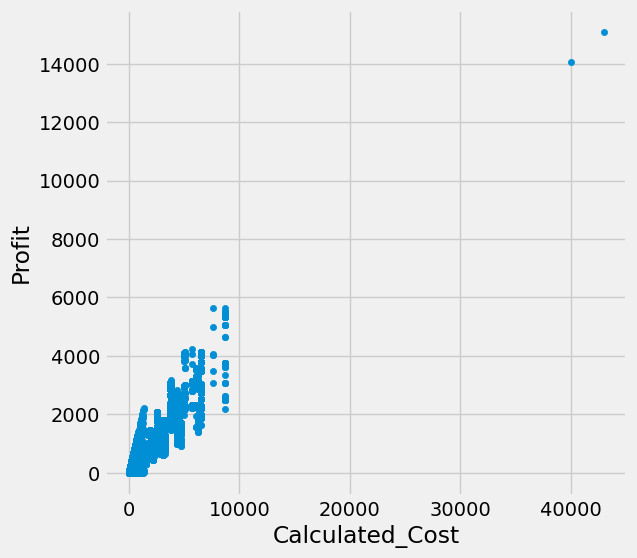

In [34]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6, 6))

In [35]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

In [36]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [37]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<AxesSubplot: ylabel='Frequency'>

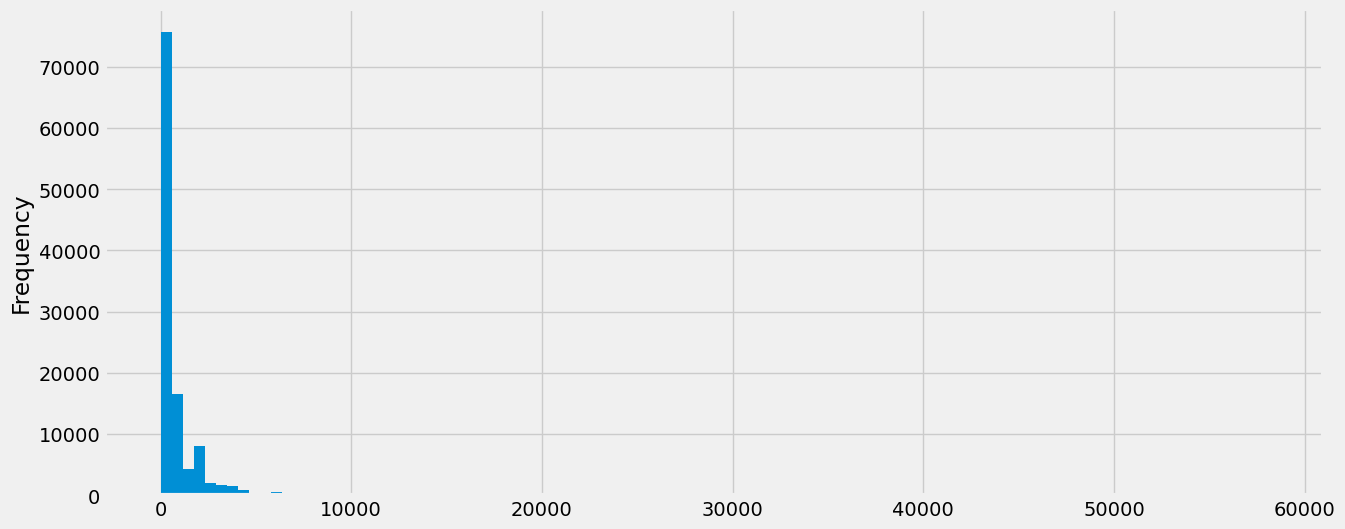

In [38]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14, 6))

### Modify all Unit_Price values adding 3% tax to them

In [39]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [40]:
sales['Unit_Price'] *= 1.03

In [41]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

### Selection and Indexing:
#### Get all the sales made in the state of Kentucky

In [42]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


In [43]:
sales['State'].value_counts()

California             22450
British Columbia       14116
England                13620
Washington             11264
New South Wales        10412
Victoria                6016
Oregon                  5286
Queensland              5220
Saarland                2770
Nordrhein-Westfalen     2484
Hessen                  2384
Seine (Paris)           2328
Hamburg                 1836
Seine Saint Denis       1684
Nord                    1670
South Australia         1564
Bayern                  1426
Hauts de Seine          1084
Essonne                  994
Yveline                  954
Tasmania                 724
Seine et Marne           394
Moselle                  386
Loiret                   382
Val d'Oise               264
Garonne (Haute)          208
Brandenburg              198
Val de Marne             158
Charente-Maritime        148
Somme                    134
Loir et Cher             120
Pas de Calais             90
Alberta                   56
Texas                     30
Ohio          

### Get the mean revenue of the Adults (35-64) sales group

In [44]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

### How many records belong to Age Group Youth (<25) or Adults (35-64)

In [45]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

In [46]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape

(73652, 21)

In [47]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

### Get the mean revenue of the sales group Adults (35-64) in United States

In [48]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

### Increase the revenue by 10% to every sales made in France

In [49]:
sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [50]:
sales.loc[sales['Country'] == 'France', 'Revenue']

50         865.7
51         865.7
52        3252.7
53        3136.1
60         688.6
           ...  
112979    1892.0
113000     405.9
113001     473.0
113034    1386.0
113035    1327.7
Name: Revenue, Length: 10998, dtype: float64

In [51]:
sales.loc[sales['Country'] == 'France']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
50,2013-07-15,15,July,2013,52,Adults (35-64),F,France,Seine Saint Denis,Accessories,...,Hitch Rack - 4-Bike,8,45,123.60,427,360,865.7,15.134615,360,787
51,2015-07-15,15,July,2015,52,Adults (35-64),F,France,Seine Saint Denis,Accessories,...,Hitch Rack - 4-Bike,8,45,123.60,427,360,865.7,15.134615,360,787
52,2013-08-17,17,August,2013,43,Adults (35-64),F,France,Moselle,Accessories,...,Hitch Rack - 4-Bike,28,45,123.60,1697,1260,3252.7,68.767442,1260,2957
53,2015-08-17,17,August,2015,43,Adults (35-64),F,France,Moselle,Accessories,...,Hitch Rack - 4-Bike,27,45,123.60,1636,1215,3136.1,66.302326,1215,2851
60,2013-09-24,24,September,2013,32,Young Adults (25-34),M,France,Nord,Accessories,...,Hitch Rack - 4-Bike,6,45,123.60,356,270,688.6,19.562500,270,626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112979,2015-09-08,8,September,2015,31,Young Adults (25-34),M,France,Essonne,Clothing,...,"Classic Vest, M",28,24,65.92,1048,672,1892.0,55.483871,672,1720
113000,2014-07-27,27,July,2014,34,Young Adults (25-34),M,France,Essonne,Clothing,...,"Classic Vest, M",6,24,65.92,225,144,405.9,10.852941,144,369
113001,2016-07-27,27,July,2016,34,Young Adults (25-34),M,France,Essonne,Clothing,...,"Classic Vest, M",7,24,65.92,262,168,473.0,12.647059,168,430
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,...,"Classic Vest, L",24,24,65.92,684,576,1386.0,34.054054,576,1260


In [52]:
np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

In [53]:
a = np.array([1, 2, 3, 4])

In [54]:
a

array([1, 2, 3, 4])

In [55]:
b = np.array([0.5, 1.3, -9.5, 0.06])

In [56]:
b

array([ 0.5 ,  1.3 , -9.5 ,  0.06])

In [57]:
a[0]

1

In [59]:
a[1], a[2]

(2, 3)

In [61]:
a[[1, 2]]

array([2, 3])

In [62]:
a

array([1, 2, 3, 4])

In [63]:
a.dtype

dtype('int64')

In [64]:
b

array([ 0.5 ,  1.3 , -9.5 ,  0.06])

In [65]:
b.dtype

dtype('float64')

In [71]:
np.array(a, dtype=float)

array([1., 2., 3., 4.])

In [86]:
np.array([1, 2, 3, 4], dtype=float)

array([1., 2., 3., 4.])

In [84]:
np.array([1, 2, 3, 4], dtype=np.int8)

array([1, 2, 3, 4], dtype=int8)

In [89]:
c = np.array(['ab', 'bc', 'cd', 'de'])

In [90]:
c.dtype

dtype('<U2')

### Dimensions and Shapes

In [91]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

In [92]:
A.shape

(2, 3)

In [94]:
A.ndim

2

In [95]:
A.size

6

In [97]:
B = np.array([
    [
    [7, 8, 9],
    [10, 11, 12]],
    [
    [13, 14, 15],
    [16, 17, 18]
    ]
])

In [98]:
B.shape

(2, 2, 3)

In [100]:
B.ndim

3

In [101]:
B.size

12

In [107]:
A = np.array([
#    0 1 2
    [1,2,3], # 0
    [4,5,6], # 1
    [7,8,9]  # 2
    
])

In [108]:
A[1]

array([4, 5, 6])

In [109]:
A[1][0]

4

In [110]:
A[1, 0]

4

In [111]:
A[0:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [117]:
A[:, :2]

array([[1, 2],
       [4, 5],
       [7, 8]])

In [118]:
A[1] = np.array([10, 10, 10])

In [119]:
A

array([[ 1,  2,  3],
       [10, 10, 10],
       [ 7,  8,  9]])

In [120]:
A[2] = 99

In [121]:
A

array([[ 1,  2,  3],
       [10, 10, 10],
       [99, 99, 99]])

In [122]:
a

array([1, 2, 3, 4])

In [124]:
a.sum()

10

In [125]:
a.mean()

2.5

In [126]:
a.std()

1.118033988749895

In [127]:
a.var()

1.25

In [128]:
A = np.array([
#    0 1 2
    [1,2,3], # 0
    [4,5,6], # 1
    [7,8,9]  # 2
    
])

In [129]:
A.sum()

45

In [130]:
A.mean()

5.0

In [131]:
A.std()

2.581988897471611

In [132]:
A.var()

6.666666666666667

In [133]:
A.sum(axis=0)

array([12, 15, 18])

In [134]:
A.sum(axis=1)

array([ 6, 15, 24])

In [135]:
A.mean(axis=0)

array([4., 5., 6.])

In [136]:
A.mean(axis=1)

array([2., 5., 8.])

In [137]:
A.std(axis=0)

array([2.44948974, 2.44948974, 2.44948974])

In [138]:
A.std(axis=1)

array([0.81649658, 0.81649658, 0.81649658])

In [139]:
A.var(axis=0)

array([6., 6., 6.])

In [140]:
A.var(axis=1)

array([0.66666667, 0.66666667, 0.66666667])

In [141]:
a = np.arange(4)

In [142]:
a

array([0, 1, 2, 3])

In [143]:
a + 10

array([10, 11, 12, 13])

In [144]:
a

array([0, 1, 2, 3])

In [145]:
a * 10

array([ 0, 10, 20, 30])

In [146]:
a

array([0, 1, 2, 3])

In [147]:
a += 100

In [148]:
a

array([100, 101, 102, 103])

In [149]:
l = [0, 1, 2, 3]

In [150]:
[i * 10 for i in l]

[0, 10, 20, 30]

In [151]:
a

array([100, 101, 102, 103])

In [152]:
a = np.arange(4)

In [153]:
a

array([0, 1, 2, 3])

In [154]:
b = np.array([10, 10, 10, 10])

In [155]:
b

array([10, 10, 10, 10])

In [156]:
a + b

array([10, 11, 12, 13])

In [157]:
a * b

array([ 0, 10, 20, 30])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [5]:
def findHeavyAnimals(data):
    # Filter rows based on weight column
    df = data[data['weight'] > 100]

    # Sort the DataFrame in descending order based on 'weight' and reset the index
    df = df.sort_values(by='weight', ascending=False).reset_index(drop=True)

    # Return the 'name' column
    return df[['name']]

# Sample usage
column_names = ['name', 'species', 'age', 'weight']
data = [['Tatiana', 'Snake', 98, 464], ['Khaled', 'Giraffe', 50, 41], ['Alex', 'Leopard', 6, 328], ['Jonathan', 'Monkey', 45, 463],['Stefan', 'Bear', 100, 50] ,['Tommy', 'Panda', 26, 349]]
animals = pd.DataFrame(data, columns=column_names)

result_table = findHeavyAnimals(animals)
print(result_table.to_string(index=False, header=True))

    name
 Tatiana
Jonathan
   Tommy
    Alex


In [6]:
def findHeavyAnimals(data):
    # Filter rows based on weight column
    df = data[data['weight'] > 100]

    # Sort the DataFrame in descending order based on 'weight' and reset the index
    df = df.sort_values(by='weight', ascending=False).reset_index(drop=True)

    # Return the DataFrame with 'name' column as string
    return df[['name', 'species', 'age', 'weight']]

# Sample usage
column_names = ['name', 'species', 'age', 'weight']
data = [['Tatiana', 'Snake', 98, 464], ['Khaled', 'Giraffe', 50, 41], ['Alex', 'Leopard', 6, 328], ['Jonathan', 'Monkey', 45, 463],['Stefan', 'Bear', 100, 50] ,['Tommy', 'Panda', 26, 349]]
animals = pd.DataFrame(data, columns=column_names)

result_table = findHeavyAnimals(animals)
print(result_table.to_string(index=False, header=True))

    name species  age  weight
 Tatiana   Snake   98     464
Jonathan  Monkey   45     463
   Tommy   Panda   26     349
    Alex Leopard    6     328


In [9]:
def findHeavyAnimals(data):
    # Filter rows based on weight column
    df = data[data['weight'] > 100]

    # Sort the DataFrame in descending order based on 'weight' and reset the index
    df = df.sort_values(by='weight', ascending=False).reset_index(drop=True)

    # Return the 'name' column as a DataFrame
    return df[['name']]#.astype(str)

# Sample usage
column_names = ['name', 'species', 'age', 'weight']
data = [['Tatiana', 'Snake', 98, 464], ['Khaled', 'Giraffe', 50, 41], ['Alex', 'Leopard', 6, 328], ['Jonathan', 'Monkey', 45, 463],['Stefan', 'Bear', 100, 50] ,['Tommy', 'Panda', 26, 349]]
animals = pd.DataFrame(data, columns=column_names)

result_table = findHeavyAnimals(animals)
print(result_table.to_string(index=False, header=True))

    name
 Tatiana
Jonathan
   Tommy
    Alex


In [10]:
# Example DataFrame with duplicate rows and values
data = {'student_id': [1, 2, 3, 4, 1],
        'name': ['Ava', 'Kate', 'John', 'Ava', 'Alice'],
        'age': [6, 15, 8, 6, 10],
        'grade': [73.0, 87.0, 95.0, 73.0, 100.0]}

students = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(students)

# Check for duplicate rows in the entire DataFrame
duplicate_rows = students.duplicated()
print("\nDuplicate rows in the entire DataFrame:")
print(duplicate_rows)

# Check for duplicate values in the 'name' column
duplicate_names = students['name'].duplicated()
print("\nDuplicate values in the 'name' column:")
print(duplicate_names)

Original DataFrame:
   student_id   name  age  grade
0           1    Ava    6   73.0
1           2   Kate   15   87.0
2           3   John    8   95.0
3           4    Ava    6   73.0
4           1  Alice   10  100.0

Duplicate rows in the entire DataFrame:
0    False
1    False
2    False
3    False
4    False
dtype: bool

Duplicate values in the 'name' column:
0    False
1    False
2    False
3     True
4    False
Name: name, dtype: bool


In [30]:
# Example DataFrame with some duplicate values
data = {'customer_id': [1, 2, 3, 4, 5, 6],
        'name': ['Ella', 'David', 'Zachary', 'Alice', 'Finn', 'Violet'],
        'email': ['emily@example.com', 'michael@example.com', 'sarah@example.com',
                  'john@example.com', 'john@example.com', 'alice@example.com']}

df = pd.DataFrame(data)

# Check for duplicates in each column after transposing the DataFrame
duplicates_in_columns = df.T.duplicated(keep=False)
columns_with_duplicates = df.columns[duplicates_in_columns]

# Display columns with duplicate values
print("\nColumns with duplicate values:")
print(columns_with_duplicates)


Columns with duplicate values:
Index([], dtype='object')


In [26]:
duplicates_in_columns = df.T.duplicated(keep=False)
columns_with_duplicates = df.columns[duplicates_in_columns.any()]

/tmp/ipykernel_4307/1145591987.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  columns_with_duplicates = df.columns[duplicates_in_columns.any()]


In [27]:
duplicates_in_columns

customer_id    False
name           False
email          False
dtype: bool

In [28]:
columns_with_duplicates

array([], shape=(0, 3), dtype=object)

In [25]:
df

,customer_id,name,email
0,1,Ella,emily@example.com
1,2,David,michael@example.com
2,3,Zachary,sarah@example.com
3,4,Alice,john@example.com
4,5,Finn,john@example.com
5,6,Violet,alice@example.com


In [31]:
for column in df.columns:
    duplicates = df[column].duplicated(keep=False)
    if duplicates.any():
        print(f"Column '{column}' has duplicates.")

Column 'email' has duplicates.


In [32]:
df.nunique()

customer_id    6
name           6
email          5
dtype: int64

In [33]:
df.describe()

,customer_id
count,6.000000
mean,3.500000
std,1.870829
min,1.000000
25%,2.250000
50%,3.500000
75%,4.750000
max,6.000000


In [34]:
print(df.describe())
print("\nNumber of unique values in each column:")
print(df.nunique())

       customer_id
count     6.000000
mean      3.500000
std       1.870829
min       1.000000
25%       2.250000
50%       3.500000
75%       4.750000
max       6.000000

Number of unique values in each column:
customer_id    6
name           6
email          5
dtype: int64


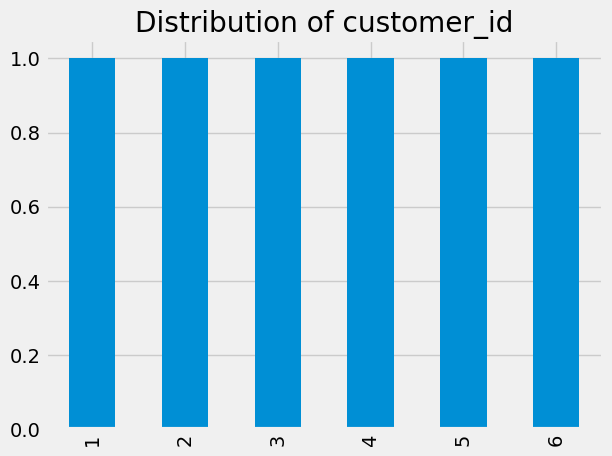

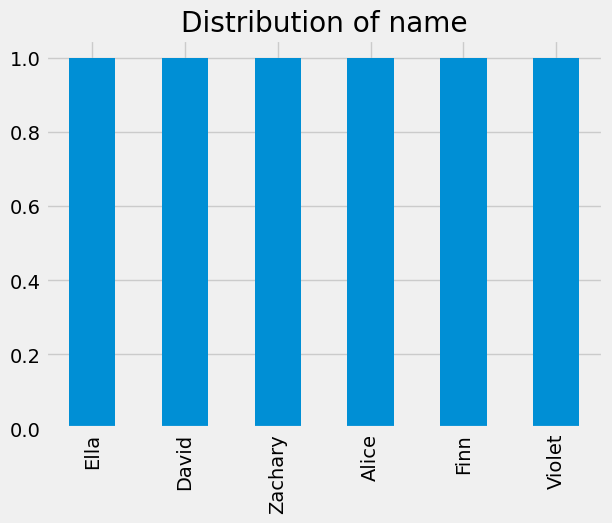

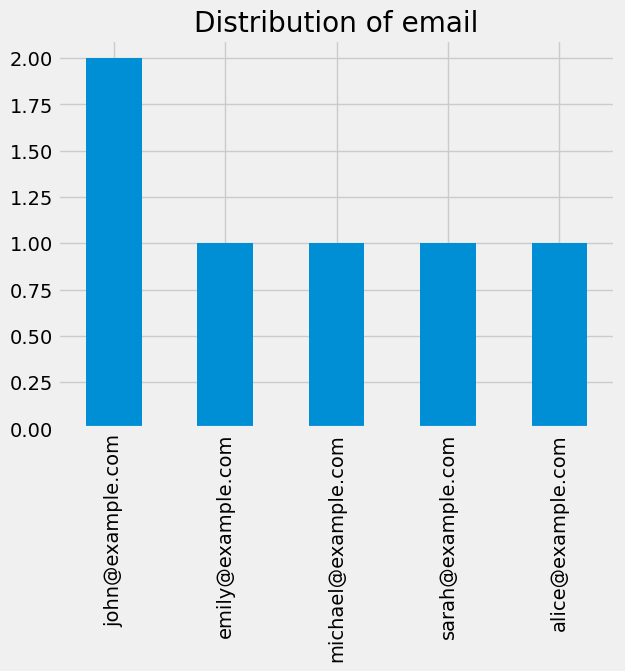

In [35]:
for column in df.columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.show()

In [36]:
df.shape

(6, 3)

In [43]:
from typing import List

In [51]:
def createDataframe(student_data: List[List[int]]) -> pd.DataFrame:
    column_names = ['student_id', 'age']
    data_list = [[1, 15], [2, 11], [3, 11], [4, 20]]
    student_data_df = pd.DataFrame(data_list, columns=column_names)
    return student_data_df

In [52]:
student_data_df

NameError: name 'student_data_df' is not defined

In [57]:
import pandas as pd
from typing import List

def createDataframe(student_data: List[List[int]]) -> pd.DataFrame:
    
    column_names = ['student_id', 'age']
    
    data_list = [[1, 15], [2, 11], [3, 11], [4, 20]]
    
    student_data_df = pd.DataFrame(data_list, columns=column_names)
    
    return student_data_df

result_df = createDataframe([[1, 15], [2, 11], [3, 11], [4, 20]])

print(result_df)

   student_id  age
0           1   15
1           2   11
2           3   11
3           4   20


In [66]:
def createDataframe(student_data: List[List[int]], column_names: List[str]) -> pd.DataFrame:
    student_data_df = pd.DataFrame(student_data, columns=column_names)
    return student_data_df

# Example usage with different data and column names
data1 = [[1, 15], [2, 11], [3, 11], [4, 20]]
data2 = [[5, 18], [6, 14], [7, 12], [8, 22]]

column_names = ['student_id', 'age']

result_df3 = createDataframe(data1, column_names)
result_df4 = createDataframe(data2, column_names)

print(result_df3)
print(result_df4)

   student_id  age
0           1   15
1           2   11
2           3   11
3           4   20
   student_id  age
0           5   18
1           6   14
2           7   12
3           8   22


In [5]:
df = teacher.groupby('teacher_id')['subject_id'].nunique().reset_index(name='cnt')

  #  return df

NameError: name 'teacher' is not defined

In [4]:
df

NameError: name 'df' is not defined

In [8]:
df = pd.DataFrame({
    'employee_id': [9, 14, 11, 15, 17, 3, 1, 7, 8, 13],
    'name': ['Kamiyah', 'Russell', 'Roger', 'Alyson', 'Elyse', 'Alivia', 'Reign', 'Brooks', 'Ryland', 'Charlee'],
    'manager_id': [2, 10, 7, None, 12, None, None, 11, 12, None],
    'salary': [65859, 86740, 85366, 91743, 10115, 53679, 77731, 89386, 61431, 41084]
})

In [9]:
df

,employee_id,name,manager_id,salary
0,9,Kamiyah,2.0,65859
1,14,Russell,10.0,86740
2,11,Roger,7.0,85366
3,15,Alyson,NaN,91743
4,17,Elyse,12.0,10115
5,3,Alivia,NaN,53679
6,1,Reign,NaN,77731
7,7,Brooks,11.0,89386
8,8,Ryland,12.0,61431
9,13,Charlee,NaN,41084


In [14]:
df[(~df['manager_id'].isin(df['employee_id'])) & (df['salary'] < 30000)]

,employee_id,name,manager_id,salary
4,17,Elyse,12.0,10115


In [15]:
data = {
    'employee_id': [18, 20, 10, 13, 17, 21, 7, 9, 2, 8, 11, 3, 14, 19],
    'name': ['Drew', 'Ronan', 'Jaxton', 'Louie', 'Mylah', 'Kenia', 'Hadley', 'Hayden', 'Nixon', 'Arthur', 'Brycen', 'Noemi', 'Hayden', 'Astrid'],
    'manager_id': [None, 3, 15, 16, 20, 15, 6, 4, None, 11, None, None, None, 20],
    'salary': [41568, 65209, 96667, 6801, 26540, 98690, 23590, 90798, 25560, 67027, 42570, 87321, 4123, 37680]
}

df = pd.DataFrame(data)

In [16]:
df

,employee_id,name,manager_id,salary
0,18,Drew,NaN,41568
1,20,Ronan,3.0,65209
2,10,Jaxton,15.0,96667
3,13,Louie,16.0,6801
4,17,Mylah,20.0,26540
5,21,Kenia,15.0,98690
6,7,Hadley,6.0,23590
7,9,Hayden,4.0,90798
8,2,Nixon,NaN,25560
9,8,Arthur,11.0,67027


In [23]:
df[(~df['manager_id'].isin(df['employee_id'])) & (df['salary'] < 30000)]

,employee_id,name,manager_id,salary
3,13,Louie,16.0,6801
6,7,Hadley,6.0,23590
8,2,Nixon,NaN,25560
12,14,Hayden,NaN,4123


Find the IDs of the employees whose salary is strictly less than $30000 and whose manager left the company. When a manager leaves the company, their information is deleted from the Employees table, but the reports still have their manager_id set to the manager that left.

In [22]:
df[(~df['manager_id'].isin(df['employee_id']) | df['manager_id'].isna()) & (df['salary'] < 30000)]

,employee_id,name,manager_id,salary
3,13,Louie,16.0,6801
6,7,Hadley,6.0,23590
8,2,Nixon,NaN,25560
12,14,Hayden,NaN,4123


In [26]:
df[(df['salary'] < 30000) & ((df['manager_id'].isna()) | (~df['manager_id'].isin(df['employee_id'])))]

,employee_id,name,manager_id,salary
3,13,Louie,16.0,6801
6,7,Hadley,6.0,23590
8,2,Nixon,NaN,25560
12,14,Hayden,NaN,4123
